In [150]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons


In [152]:
X, Y= make_moons(n_samples=500, shuffle=True, noise=0.2, random_state=1)
'''X,Y= make_blobs(    n_samples=500,
    n_features=2,
    centers=2,
    random_state=1)'''

'X,Y= make_blobs(    n_samples=500,\n    n_features=2,\n    centers=2,\n    random_state=1)'

(500, 2) (500,)


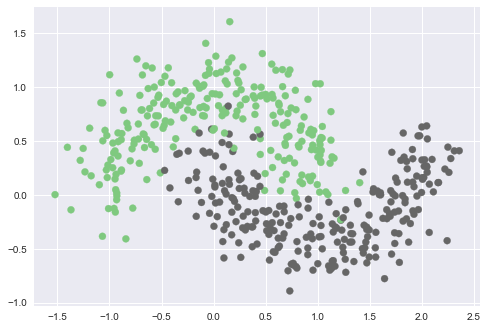

In [153]:
print(X.shape, Y.shape)
plt.style.use("seaborn")

plt.scatter(X[:,0], X[:,1], c= Y,cmap= plt.cm.Accent )
plt.show()


### model and helper functions 

In [154]:
 def sigmoid(z):
        return (1.0/(1+np.exp(-z)))

### implement perceptron learning algorithm
- learn the weight 
- lower the loss
- make the predictions

In [155]:
def predict(X, w):
    
    z = np.dot(X, w)
    predictions= sigmoid(z)
    return predictions


In [156]:
def loss(X, w, Y):
    Y_= predict(X, w)
    cost= np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
    return cost

In [157]:
def update(X, w , Y, learning_rate):
    Y_= predict(X, w)
    dw= np.dot(X.T, Y_-Y)
    m= X.shape[0]
    w = w-(learning_rate*(dw/ float(m)))
    return w
    

In [158]:
def  training(X, Y, learning_rate= 0.1, maxepoch= 100):
    bias= np.ones((X.shape[0],1))
    X=np.hstack((bias,X))
    
    weights= np.zeros((X.shape[1],))
    
    for epoch in range(maxepoch):
        weights= update(X, weights, Y, learning_rate)
        
        if(epoch%10==0):
            l= loss(X, weights,Y)
            print("for epoch %d and loss is %.4f"%( epoch , l))
    return weights
                  

In [163]:
weights=training(X,Y)
weights


for epoch 0 and loss is 0.6833
for epoch 10 and loss is 0.6044
for epoch 20 and loss is 0.5499
for epoch 30 and loss is 0.5104
for epoch 40 and loss is 0.4807
for epoch 50 and loss is 0.4575
for epoch 60 and loss is 0.4390
for epoch 70 and loss is 0.4239
for epoch 80 and loss is 0.4113
for epoch 90 and loss is 0.4007


array([-0.15468491,  1.01607357, -1.24624127])

##  perceptron implementation -part 2
- make predictions
- visual decision tree
- lenear vs non-linear classification

In [160]:
def getprediction(X, weights, labels=True):
    if X.shape[1]!= weights.shape[0]:
        ones= np.ones((X.shape[0],1))
        X= np.hstack((ones,X))
    probs = predict(X,weights)
    if(labels==False):
        return probs
    else :
        labels = np.zeros(probs.shape)
        labels[probs>=0.5]= 1;
        return labels

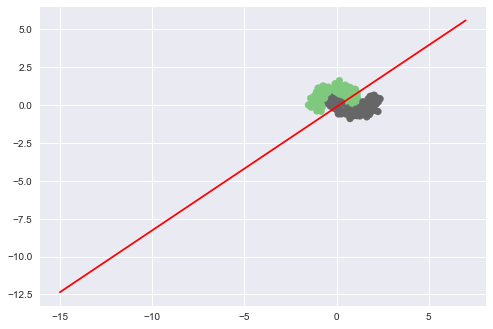

In [161]:
x1= np.linspace(-15, 7, 10);
x2= -(weights[0]+ weights[1]*x1)/weights[2]


plt.scatter(X[:,0], X[:,1], c=Y, cmap= plt.cm.Accent)
plt.plot(x1, x2, c='red')

In [162]:
Y_= getprediction(X,weights,True)
percentage=((np.sum(Y==Y_))/Y.shape[0])*100
print(percentage)

81.8
